In [ ]:
# Importação das bibliotecas

!pip install scikit-fuzzy

import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
from matplotlib import pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=48397300a128ff9f0c63813115e2db2dfd2043bc4bfa4c2d8c1fcb96ff016eeb
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


# Versão 1 - Utiliza valores padrões da biblioteca skfuzzy

In [ ]:
# Cria as variáveis linguísticas do problema

distancia = ctrl.Antecedent(np.arange(0, 100, 1), 'distancia')
permissao = ctrl.Antecedent(np.arange(0, 100, 1), 'permissao')
pista = ctrl.Antecedent(np.arange(0, 100, 1), 'pista')
velocidade = ctrl.Antecedent(np.arange(0, 100, 1), 'velocidade')
visibilidade = ctrl.Antecedent(np.arange(0, 100, 1), 'visibilidade')

ultrapassagem = ctrl.Consequent(np.arange(0, 100, 1), 'ultrapassagem')

In [ ]:
# Cria automaticamente o mapeamento entre os termos linguísticos através da função de pertinência padrão (triangular)

distancia.automf(number = 2, names = ['Inadequada', 'Adequada'])
permissao.automf(number = 2, names = ['Nao', 'Sim'])
pista.automf(number = 2, names = ['Obstruida', 'Livre'])
velocidade.automf(number = 2, names = ['Inadequada', 'Adequada'])
visibilidade.automf(number = 3, names = ['Ruim', 'Media', 'Boa'])

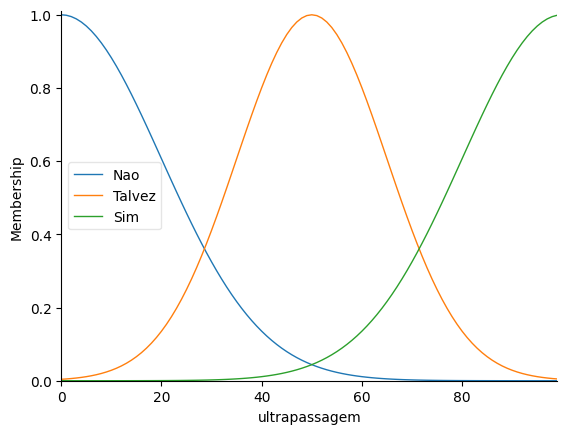

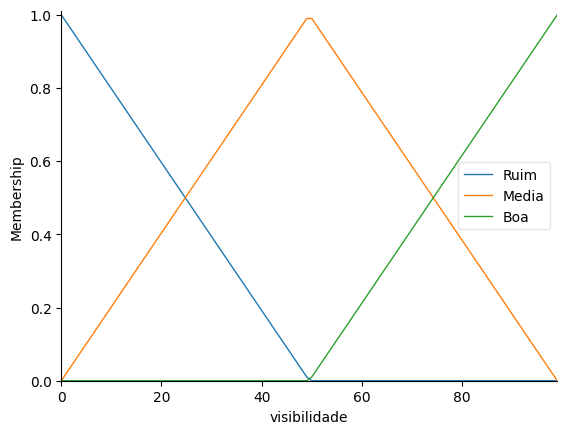

In [ ]:
# Para a variável de saída, cria a função de pertinência através da função gaussmf

ultrapassagem['Nao'] = fuzz.gaussmf(ultrapassagem.universe, 0, 20)
ultrapassagem['Talvez'] = fuzz.gaussmf(ultrapassagem.universe, 50, 15)
ultrapassagem['Sim'] = fuzz.gaussmf(ultrapassagem.universe, 100, 20)

# Plota somente dois gráficos das funções de pertinência para todas as variáveis linguísticas

ultrapassagem.view()
visibilidade.view()

In [ ]:
# Determina manualmente o conjunto de regras de inferência

regra1 = ctrl.Rule(permissao['Nao'], ultrapassagem['Nao'])
regra2 = ctrl.Rule(pista['Obstruida'], ultrapassagem['Nao'])
regra3 = ctrl.Rule(visibilidade['Ruim'], ultrapassagem['Nao'])
regra4 = ctrl.Rule(velocidade['Inadequada'], ultrapassagem['Nao'])
regra5 = ctrl.Rule(distancia['Inadequada'], ultrapassagem['Nao'])
regra6 = ctrl.Rule(visibilidade['Media'] & permissao['Sim'] & pista['Livre'] & distancia['Adequada'] & velocidade['Adequada'], ultrapassagem['Talvez'])
regra7 = ctrl.Rule(visibilidade['Boa'] & permissao['Sim'] & pista['Livre'] & distancia['Adequada'] & velocidade['Adequada'], ultrapassagem['Sim'])

In [ ]:
# Adiciona regras na função que irá fazer a simulação do sistema

recomendacao_ultrapassagem = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7])

recomendacao = ctrl.ControlSystemSimulation(recomendacao_ultrapassagem)

54.70829067775455


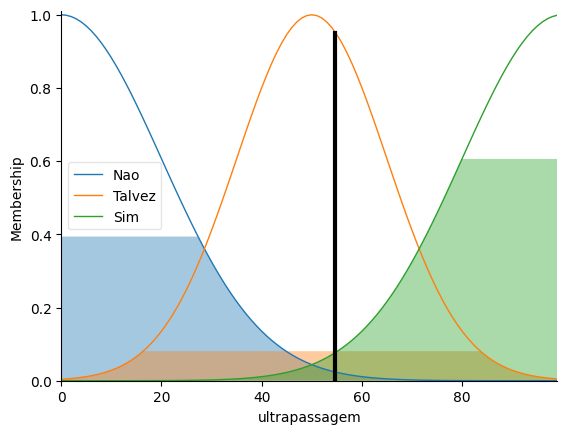

In [ ]:
# Define os valores de entrada para testar o sistema fuzzy

recomendacao.input['distancia'] = 95
recomendacao.input['permissao'] = 60
recomendacao.input['pista'] = 95
recomendacao.input['velocidade'] = 95
recomendacao.input['visibilidade'] = 95
recomendacao.compute()

# Utiliza as funções padrões do skfuzzy para calcular o valor final

print(recomendacao.output['ultrapassagem'])
ultrapassagem.view(sim = recomendacao)

# Versão 2 - Utiliza modelo de inferência de Mamdani e Larsen com diferentes métodos de defuzzificação

In [ ]:
# Determina os intervalos de valores para cada variável linguística

x_distancia = np.arange(0, 100, 1)
x_permissao = np.arange(0, 100, 1)
x_pista = np.arange(0, 100, 1)
x_velocidade = np.arange(0, 100, 1)
x_visibilidade = np.arange(0, 100, 1)
x_ultrapassagem = np.arange(0, 100, 1)

# Determina os termos linguísticos de cada variável (usando função triangular)

distancia_inadequada = fuzz.trimf(x_distancia, [0, 0, 100])
distancia_adequada = fuzz.trimf(x_distancia, [0, 100, 100])
sem_permissao = fuzz.trimf(x_permissao, [0, 0, 100])
com_permissao = fuzz.trimf(x_permissao, [0, 100, 100])
pista_obstruida = fuzz.trimf(x_permissao, [0, 0, 100])
pista_livre = fuzz.trimf(x_permissao, [0, 100, 100])
velocidade_inadequada = fuzz.trimf(x_permissao, [0, 0, 100])
velocidade_adequada = fuzz.trimf(x_permissao, [0, 100, 100])
visibilidade_ruim = fuzz.trimf(x_visibilidade, [0, 0, 50])
visibilidade_media = fuzz.trimf(x_visibilidade, [0, 50, 100])
visibilidade_boa = fuzz.trimf(x_visibilidade, [50, 100, 100])

# Determina os termos linguísticos para a variável de saída (usando função gaussiana)

sem_ultrapassagem = fuzz.gaussmf(x_ultrapassagem, 0, 20)
talvez_ultrapassagem = fuzz.gaussmf(x_ultrapassagem, 50, 15)
sim_ultrapassagem = fuzz.gaussmf(x_ultrapassagem, 100, 20)

In [ ]:
# Determina os valores de entrada para o teste do sistema

distancia_score = 90
permissao_score = 80
pista_score = 85
velocidade_score = 90
visibilidade_score = 80

In [ ]:
# Calcula o grau de pertinência dos termos linguísticos de cada variável de acordo com as entradas (scores)

distancia_inadequada_degree = fuzz.interp_membership(x_distancia, distancia_inadequada, distancia_score)
distancia_adequada_degree = fuzz.interp_membership(x_distancia, distancia_adequada, distancia_score)

sem_permissao_degree = fuzz.interp_membership(x_permissao, sem_permissao, permissao_score)
com_permissao_degree = fuzz.interp_membership(x_permissao, com_permissao, permissao_score)

pista_obstruida_degree = fuzz.interp_membership(x_pista, pista_obstruida, pista_score)
pista_livre_degree = fuzz.interp_membership(x_pista, pista_livre, pista_score)

velocidade_inadequada_degree = fuzz.interp_membership(x_velocidade, velocidade_inadequada, velocidade_score)
velocidade_adequada_degree = fuzz.interp_membership(x_velocidade, velocidade_adequada, velocidade_score)

visibilidade_ruim_degree = fuzz.interp_membership(x_visibilidade, visibilidade_ruim, visibilidade_score)
visibilidade_media_degree = fuzz.interp_membership(x_visibilidade, visibilidade_media, visibilidade_score)
visibilidade_boa_degree = fuzz.interp_membership(x_visibilidade, visibilidade_boa, visibilidade_score)

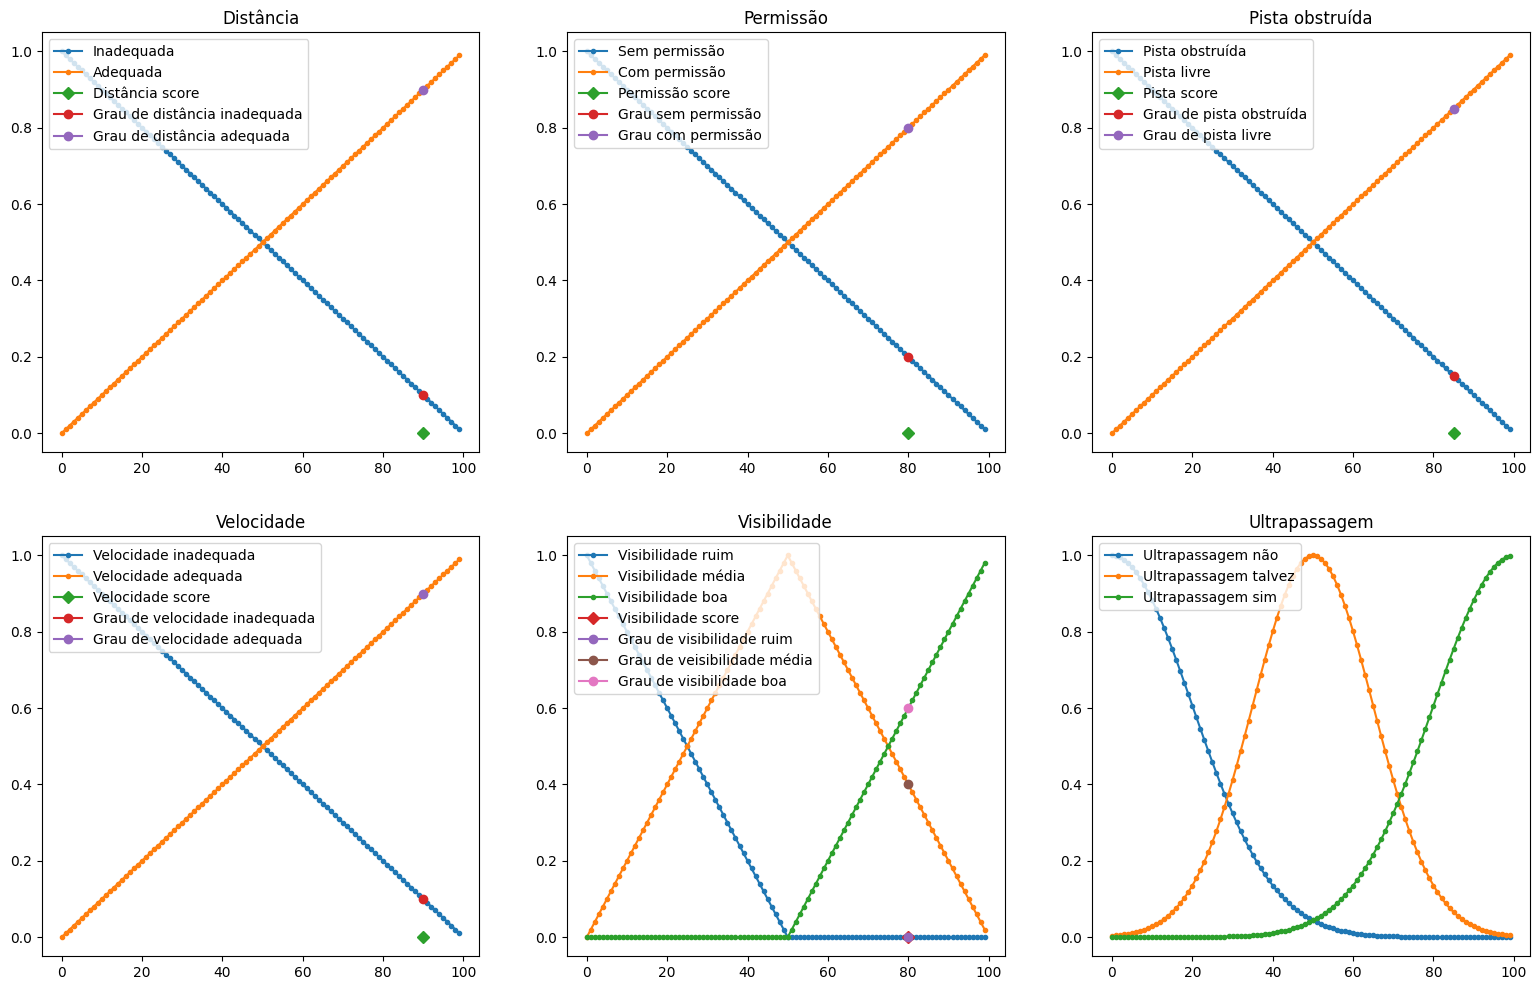

In [ ]:
# Plotagem dos gráficos com os graus de pertinência dos termos linguísticos de cada variável de acordo com as entradas (scores)

fig_scale_x = 3.0
fig_scale_y = 2.5
fig = plt.figure(figsize=(6.4 * fig_scale_x, 4.8 * fig_scale_y))
row = 2
col = 3

plt.subplot(row, col, 1)
plt.title("Distância")
plt.plot(x_distancia, distancia_inadequada, label="Inadequada", marker=".")
plt.plot(x_distancia, distancia_adequada, label="Adequada", marker=".")
plt.plot(distancia_score, 0.0, label="Distância score", marker="D")
plt.plot(distancia_score, distancia_inadequada_degree,
         label="Grau de distância inadequada", marker="o")
plt.plot(distancia_score, distancia_adequada_degree,
         label="Grau de distância adequada", marker="o")
plt.legend(loc="upper left")

plt.subplot(row, col, 2)
plt.title("Permissão")
plt.plot(x_permissao, sem_permissao, label="Sem permissão", marker=".")
plt.plot(x_permissao, com_permissao, label="Com permissão", marker=".")
plt.plot(permissao_score, 0.0, label="Permissão score", marker="D")
plt.plot(permissao_score, sem_permissao_degree,
         label="Grau sem permissão", marker="o")
plt.plot(permissao_score, com_permissao_degree,
         label="Grau com permissão", marker="o")
plt.legend(loc="upper left")

plt.subplot(row, col, 3)
plt.title("Pista obstruída")
plt.plot(x_pista, pista_obstruida, label="Pista obstruída", marker=".")
plt.plot(x_pista, pista_livre, label="Pista livre", marker=".")
plt.plot(pista_score, 0.0, label="Pista score", marker="D")
plt.plot(pista_score, pista_obstruida_degree,
         label="Grau de pista obstruída", marker="o")
plt.plot(pista_score, pista_livre_degree,
         label="Grau de pista livre", marker="o")
plt.legend(loc="upper left")

plt.subplot(row, col, 4)
plt.title("Velocidade")
plt.plot(x_velocidade, velocidade_inadequada, label="Velocidade inadequada", marker=".")
plt.plot(x_velocidade, velocidade_adequada, label="Velocidade adequada", marker=".")
plt.plot(velocidade_score, 0.0, label="Velocidade score", marker="D")
plt.plot(velocidade_score, velocidade_inadequada_degree,
         label="Grau de velocidade inadequada", marker="o")
plt.plot(velocidade_score, velocidade_adequada_degree,
         label="Grau de velocidade adequada", marker="o")
plt.legend(loc="upper left")

plt.subplot(row, col, 5)
plt.title("Visibilidade")
plt.plot(x_visibilidade, visibilidade_ruim, label="Visibilidade ruim", marker=".")
plt.plot(x_visibilidade, visibilidade_media, label="Visibilidade média", marker=".")
plt.plot(x_visibilidade, visibilidade_boa, label="Visibilidade boa", marker=".")
plt.plot(visibilidade_score, 0.0, label="Visibilidade score", marker="D")
plt.plot(visibilidade_score, visibilidade_ruim_degree,
         label="Grau de visibilidade ruim", marker="o")
plt.plot(visibilidade_score, visibilidade_media_degree,
         label="Grau de veisibilidade média", marker="o")
plt.plot(visibilidade_score, visibilidade_boa_degree,
         label="Grau de visibilidade boa", marker="o")
plt.legend(loc="upper left")

plt.subplot(row, col, 6)
plt.title("Ultrapassagem")
plt.plot(x_ultrapassagem, sem_ultrapassagem, label="Ultrapassagem não", marker=".")
plt.plot(x_ultrapassagem, talvez_ultrapassagem, label="Ultrapassagem talvez", marker=".")
plt.plot(x_ultrapassagem, sim_ultrapassagem, label="Ultrapassagem sim", marker=".")
plt.legend(loc="upper left")

In [ ]:
# Modelo de inferência MAX-MIN de Mamdani e Larsen

# Distância inadequada ou sem permissão de ultrapassagem ou pista obstruída ou velocidade inadequada ou visibilidade ruim

low_degree = np.fmax(distancia_inadequada_degree, sem_permissao_degree)
low_degree = np.fmax(low_degree, pista_obstruida_degree)
low_degree = np.fmax(low_degree, velocidade_inadequada_degree)
low_degree = np.fmax(low_degree, visibilidade_ruim_degree)

# Visibilidade média

middle_degree = visibilidade_media_degree

# Distância adequada ou com permissão de ultrapassagem ou pista livre ou velocidade adequada ou visibilidade boa

high_degree = np.fmax(distancia_adequada_degree, com_permissao_degree)
high_degree = np.fmax(high_degree, pista_livre_degree)
high_degree = np.fmax(high_degree, velocidade_adequada_degree)
high_degree = np.fmax(high_degree, visibilidade_boa_degree)

# Determina o MÍNIMO entre os valores disparados pelas regras

activation_low = np.fmin(low_degree, sem_ultrapassagem)
activation_middle = np.fmin(middle_degree, talvez_ultrapassagem)
activation_high = np.fmin(high_degree, sim_ultrapassagem)

# Aplicação das regras a partir do MÁXIMO, isto é, o maior valor entre os mínimos resultantes da operação de agregação

aggregated = np.fmax(activation_low, np.fmax(activation_middle, activation_high))

# Defuzzificação

# Centróide (Centre of the area – COA)
tip_centroid = fuzz.defuzz(x_ultrapassagem, aggregated, 'centroid')

# Bisector (Bisector of Area Method - BOA)
tip_bisector = fuzz.defuzz(x_ultrapassagem, aggregated, 'bisector')

# Middle of maximum
tip_mom = fuzz.defuzz(x_ultrapassagem, aggregated, "mom")

# Smallest of maximum
tip_som = fuzz.defuzz(x_ultrapassagem, aggregated, "som")

# Last of maximum
tip_lom = fuzz.defuzz(x_ultrapassagem, aggregated, "lom")

# Imprime os resultados para cada método de defuzzificação

print('Centróide (COA): {}'.format(tip_centroid))
print('Bisector (BOA): {}'.format(tip_bisector))
print('Middle of maximum (MOM): {}'.format(tip_mom))
print('Smallest of maximum (SOM): {}'.format(tip_som))
print('Last of maximum (LOM): {}'.format(tip_lom))

Centróide (COA): 62.0882505029172
Bisector (BOA): 66.99751645214067
Middle of maximum (MOM): 95.0
Smallest of maximum (SOM): 91
Last of maximum (LOM): 99


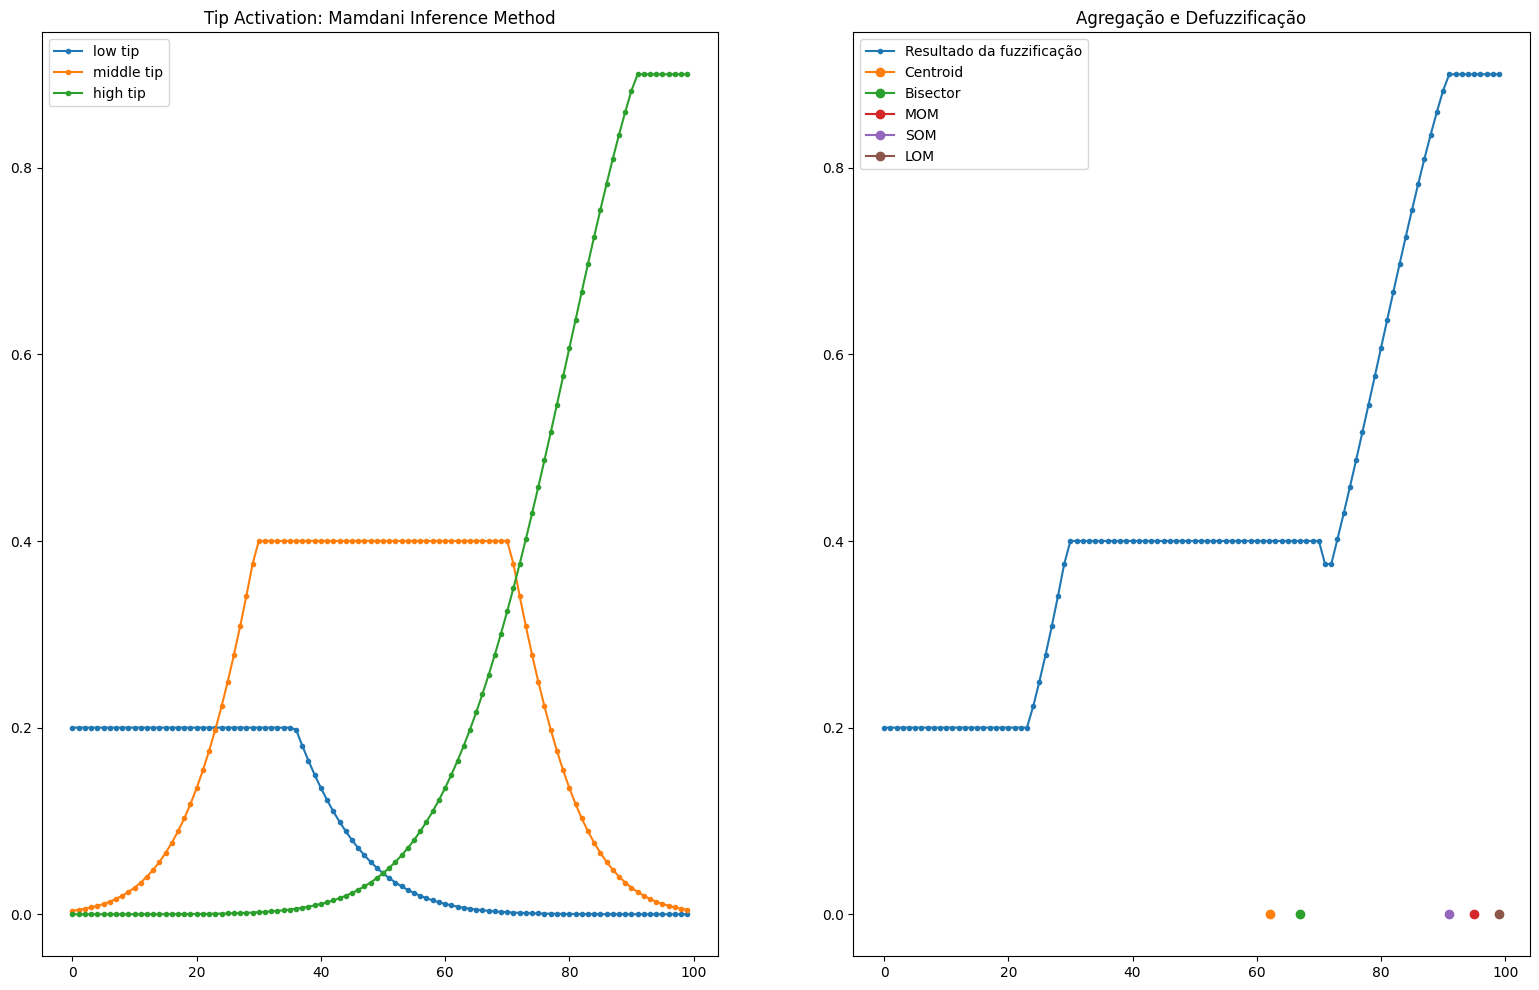

In [ ]:
fig_scale_x = 3.0
fig_scale_y = 2.5
fig = plt.figure(figsize=(6.4 * fig_scale_x, 4.8 * fig_scale_y))
row = 1
col = 2

plt.subplot(row, col, 1)
plt.subplot(row, col, 1)
plt.title("Tip Activation: Mamdani Inference Method")
plt.plot(x_ultrapassagem, activation_low, label="low tip", marker=".")
plt.plot(x_ultrapassagem, activation_middle, label="middle tip", marker=".")
plt.plot(x_ultrapassagem, activation_high, label="high tip", marker=".")
plt.legend(loc="upper left")


plt.subplot(row, col, 2)
plt.title("Agregação e Defuzzificação")
plt.plot(x_ultrapassagem, aggregated, label="Resultado da fuzzificação", marker=".")
plt.plot(tip_centroid, 0.0, label="Centroid", marker="o")
plt.plot(tip_bisector, 0.0, label="Bisector", marker="o")
plt.plot(tip_mom, 0.0, label="MOM", marker="o")
plt.plot(tip_som, 0.0, label="SOM", marker="o")
plt.plot(tip_lom, 0.0, label="LOM", marker="o")
plt.legend(loc="upper left")

plt.show()